In [4]:
using Plots, TaylorSeries

### Método de Newton

En una variable: 

$$x_{n+1} = x_{n} - \dfrac{f(x_{n})}{f'(x_{n})}$$

En varias variables:

$$\vec{x_{n+1}} = \vec{x_{n}} - \left[\textbf{J}(\vec{x_{n}})\right]^{-1}F(\vec{x_{n}})$$


In [228]:
"""


        x = Newton(f,p,x0::Float64,orden::Int64; ite = 20, tol = 1e-16)


Esta función devuelve una raíz de la función `f` que tiene como argumento una variable de tipo arbitrario `x` y un parámetro `p`, es decir, `f(x,p)`.

Los parámetros de entrada son la función `f`, el parámetro `p`, un valor cercano a la raíz dado de forma arbitraria `x0::Float64`, el orden de la serie de Taylor `orden::Int64`. Este método no necesita la derivada analìtica de `f`.


Los parámetros opcionales son `ite::Int64` que limita el número de iteraciones del método y `tol::Float64` es la máxima tolerancia que deseas, es decir:

        f(x,p) <= tol

Si `f(x,p) > to` para el nùmero de iteraciones dado se devuelve `x = NaN`
"""
function Newton(f,p,x0::Float64,orden::Int64; ite = 30, tol = 1e-16)
    x_new = x0
    i = 1
    while i <= ite && f(x_new,p) != 0.0
        x_old = x_new
        x = Taylor1([x_old,1],orden)
        x_new = x_old - (f(x,p)/differentiate(f(x,p)))(0.0)
        i += 1
    end
    if abs(f(x_new,p)) <= tol
        return x_new
    else
        println("El método no convergió en la tolerancia deseada\t |f($(x_new),$(p))| = $(abs(f(x_new,p))) > $(tol)")
        return NaN
    end
end;

In [229]:
"""


        Newton(f,p,x0::Float64,df::Float64; ite = 20, tol = 1e-16)


En este método sí necesita la derivada analítica `df(x,p)` de `f` en lugar del `orden` de Taylor.
"""
function Newton(f::F, p,x0::Float64,df; ite = 30, tol = 1e-16) where {F}
    x_new = x0
    i = 1
    while i <= ite && f(x_new,p) != 0.0
        x_old = x_new
        x_new = x_old - f(x_old,p)/df(x_old,p)
        i += 1
    end
    if abs(f(x_new,p)) <= tol
        return x_new
    else
        println("El método no convergió en la tolerancia deseada\t |f($(x_new),$(p))| = $(abs(f(x_new,p))) > $(tol)")
        return NaN
    end
end;

In [230]:
"""

    X = Estabilidad(f,x0::Float64,P::Vector{Float64},orden::Int64; Tol = 1.e-16)

Esta función regresa una lista de los puntos estables `X::Vector{Float64}` de igual longitud que la lista de parámetros `P::Vector{Float64}` de la ecuación diferencial descrita por la función `f` a partir de un punto estable conocido `x0::FLoat64` para el primer elemento de la lista de parámetros, es decir:


       f(x0,P[1]) <= Tol


Si la función tiene varios puntos estables para el parámetro `P[1]`, evalua `Estabilidad` para cada uno de esos puntos estables.

Si para algún parámetro de `P[i]`no existe un punto estable, le corresponderá un valor `X[i] = NaN` en el vector de salida.

Este método no necesita la derivada analítica de `f` al poner el parámetro `orden::Int64` en la cuarta entrada que define el orden de la serie de Taylor de `f`.

"""
function Estabilidad(f,x0::Float64,P::Vector{Float64},orden::Int64; Tol = 1.e-16)
    N = length(P)
    X = zeros(N)
    #x_old = Newton(f,P[1],x0,orden; tol = Tol)
    #X[1] = x_old
    x_old = x0
    for i in 1:N
        x_new =  Newton(f,P[i],x_old,orden; tol = Tol)
        if !isnan(x_new)
            x_old = x_new
        end
        X[i] = x_new
    end
    return X
end;

In [231]:
"""

    X = Estabilidad(f,x0::Float64,P::Vector{Float64},df; Tol = 1.e-16)

Este método sí necesita la derivada analítica `df` de la función `f` asociada a la ecuación diferencial en la cuarta entrada en lugar del parámetro `orden::Int64`.


"""
function Estabilidad(f,x0::Float64,P::Vector{Float64},df; Tol = 1.e-16)
    N = length(P)
    X = zeros(N)
    #x_old = Newton(f,P[1],x0,df; tol = Tol)
    #X[1] = x_old
    x_old = x0
    for i in 1:N
        x_new =  Newton(f,P[i],x_old,df; tol = Tol)
        if !isnan(x_new)
            x_old = x_new
        end
        X[i] = x_new
    end
    return X
end;

In [232]:
?Newton

search: Newton



```
    x = Newton(f,p,x0::Float64,orden::Int64; ite = 20, tol = 1e-16)
```

Esta función devuelve una raíz de la función `f` que tiene como argumento una variable de tipo arbitrario `x` y un parámetro `p`, es decir, `f(x,p)`.

Los parámetros de entrada son la función `f`, el parámetro `p`, un valor cercano a la raíz dado de forma arbitraria `x0::Float64`, el orden de la serie de Taylor `orden::Int64`. Este método no necesita la derivada analìtica de `f`.

Los parámetros opcionales son `ite::Int64` que limita el número de iteraciones del método y `tol::Float64` es la máxima tolerancia que deseas, es decir:

```
    f(x,p) <= tol
```

Si `f(x,p) > to` para el nùmero de iteraciones dado se devuelve `x = NaN`

---

```
    Newton(f,p,x0::Float64,df::Float64; ite = 20, tol = 1e-16)
```

En este método sí necesita la derivada analítica `df(x,p)` de `f` en lugar del `orden` de Taylor.


In [233]:
?Estabilidad

search: Estabilidad



```
X = Estabilidad(f,x0::Float64,P::Vector{Float64},orden::Int64; Tol = 1.e-16)
```

Esta función regresa una lista de los puntos estables `X::Vector{Float64}` de igual longitud que la lista de parámetros `P::Vector{Float64}` de la ecuación diferencial descrita por la función `f` a partir de un punto estable conocido `x0::FLoat64` para el primer elemento de la lista de parámetros, es decir:

```
   f(x0,P[1]) <= Tol
```

Si la función tiene varios puntos estables para el parámetro `P[1]`, evalua `Estabilidad` para cada uno de esos puntos estables.

Si para algún parámetro de `P[i]`no existe un punto estable, le corresponderá un valor `X[i] = NaN` en el vector de salida.

Este método no necesita la derivada analítica de `f` al poner el parámetro `orden::Int64` en la cuarta entrada que define el orden de la serie de Taylor de `f`.

---

```
X = Estabilidad(f,x0::Float64,P::Vector{Float64},df; Tol = 1.e-16)
```

Este método sí necesita la derivada analítica `df` de la función `f` asociada a la ecuación diferencial en la cuarta entrada en lugar del parámetro `orden::Int64`.


#### Ejemplo 1

$$g(u,\lambda) = (u^{2} -1)(u^{2}-4) + \lambda u^{2} e^{u/10}$$

$$\dfrac{dg}{du}(u,\lambda) = (2u)(u^{2}-4 + u^{2}-1) + 2 \lambda u e^{u/10} + \dfrac{\lambda u^{2} e^{u/10}}{10} = 4u^{3}-10u  + 2 \lambda u e^{u/10} + \dfrac{\lambda u^{2} e^{u/10}}{10}$$

In [234]:
g(u,λ) = (u^2 -1)*(u^2-4) + λ*u^2*exp(u/10)
dg(u,λ) = 4*u^3 -10*u + 2*λ*u*exp(u/10) + (λ*u^2*exp(u/10))/10;

In [235]:
Λ = Vector(0.0:0.005:1.0)
U0 = [-2.0,-1.0,1.0,2.0];

In [236]:
orden = 20
ϵ = [1.e-16,1.e-15,1.e-14];

In [237]:
U_sol_T = [[Estabilidad(g,u0,Λ,orden; Tol = i) for u0 in U0] for i in ϵ];

El método no convergió en la tolerancia deseada	 |f(-1.9986341737356565,0.005)| = 1.2906342661267445e-15 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.997265786825975,0.01)| = 1.0408340855860843e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.995894823200998,0.015)| = 8.673617379884035e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9945212666158567,0.02)| = 6.522560269672795e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9931451006480752,0.025)| = 1.0685896612017132e-15 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9903848739700958,0.035)| = 8.604228440844963e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9890007795018814,0.04)| = 3.3306690738754696e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9876140081292124,0.045)| = 1.3877787807814457e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9862245424992016,0.05)| = 1.66533

El método no convergió en la tolerancia deseada	 |f(-1.8523649159806748,0.485)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8506351924595323,0.49)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8488997993846572,0.495)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8471586737052546,0.5)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.843658966277296,0.51)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8419002522759844,0.515)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.840135541096075,0.52)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8383647633298248,0.525)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.836587848190887,0.53)| = 6.6613381477509

El método no convergió en la tolerancia deseada	 |f(-1.0030350940600854,0.02)| = 3.0531133177191805e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0037998623558062,0.025)| = 2.5673907444456745e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0045670611908424,0.03)| = 3.469446951953614e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0053367071959771,0.035)| = 5.134781488891349e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0061088171878225,0.04)| = 3.191891195797325e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.006883408171737,0.045)| = 4.163336342344337e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0076604973448058,0.05)| = 2.3592239273284576e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.008440102098878,0.055)| = 4.2327252813834093e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0092222400236703,0.06)| = 4.3021142

El método no convergió en la tolerancia deseada	 |f(-1.0975716934392767,0.53)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0987226502749212,0.535)| = 5.551115123125783e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0998796779983178,0.54)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.101042851592856,0.545)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.1022122475841085,0.55)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.1033879440846466,0.555)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.10457002084055,0.56)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.1057585592796828,0.565)| = 8.881784197001252e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.1069536425618223,0.57)| = 2.220446049

El método no convergió en la tolerancia deseada	 |f(1.0113389885823432,0.06)| = 2.498001805406602e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0142678213770426,0.075)| = 3.0531133177191805e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0152528965623335,0.08)| = 2.7755575615628914e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0162424430040091,0.085)| = 1.249000902703301e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0182351284847326,0.095)| = 6.106226635438361e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0192383587578049,0.1)| = 4.718447854656915e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0202462427885692,0.105)| = 2.3592239273284576e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0212588280896433,0.11)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0222761629635673,0.115)| = 5.551115123125783

El método no convergió en la tolerancia deseada	 |f(1.1492283236364291,0.58)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1511681981442903,0.585)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1531295677944466,0.59)| = 5.551115123125783e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1551130213254188,0.595)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1571191745543121,0.6)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1612021895630578,0.61)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1632804351128228,0.615)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1675141221742051,0.625)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.169671166290584,0.63)| = 2.220446049250313e-

El método no convergió en la tolerancia deseada	 |f(1.9193824657000296,0.19)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9171608442468522,0.195)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9149333439171259,0.2)| = 9.992007221626409e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9126998982427348,0.205)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.910460439496401,0.21)| = 3.3306690738754696e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.908214898658098,0.215)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9059632053803006,0.22)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9037052879520293,0.225)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9014410732616311,0.23)| = 2.220446049250313e-16

El método no convergió en la tolerancia deseada	 |f(1.5103824596094617,0.83)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.4763024177689128,0.85)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.407203156667403,0.87)| = 0.0032809798059605377 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.3760961995759255,0.875)| = 0.01905075631158626 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(2.0005238554913296,0.88)| = 4.308107063534653 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.4167419452843113,0.885)| = 0.039588340039878656 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.6849698111669424,0.89)| = 8.881784197001252e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.3501107464065276,0.895)| = 0.0758250168740453 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.080448986132695,0.9)| = 0.6964105754350662 > 1.0e-16
El m

In [238]:
U_sol_A = [[Estabilidad(g,u0,Λ,dg; Tol = i) for u0 in U0] for i in ϵ];

El método no convergió en la tolerancia deseada	 |f(-1.9986341737356565,0.005)| = 1.2906342661267445e-15 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.997265786825975,0.01)| = 1.0408340855860843e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.995894823200998,0.015)| = 8.673617379884035e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9945212666158567,0.02)| = 6.522560269672795e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9931451006480752,0.025)| = 1.0685896612017132e-15 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9903848739700958,0.035)| = 8.604228440844963e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9890007795018814,0.04)| = 3.3306690738754696e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9876140081292124,0.045)| = 1.3877787807814457e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.9862245424992016,0.05)| = 1.66533

El método no convergió en la tolerancia deseada	 |f(-1.8523649159806748,0.485)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8506351924595323,0.49)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8488997993846572,0.495)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8471586737052546,0.5)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.843658966277296,0.51)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8419002522759844,0.515)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.840135541096075,0.52)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.8383647633298248,0.525)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.836587848190887,0.53)| = 6.6613381477509

El método no convergió en la tolerancia deseada	 |f(-1.0030350940600854,0.02)| = 3.0531133177191805e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0037998623558062,0.025)| = 2.5673907444456745e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0045670611908424,0.03)| = 3.469446951953614e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0053367071959771,0.035)| = 5.134781488891349e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0061088171878225,0.04)| = 3.191891195797325e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.006883408171737,0.045)| = 4.163336342344337e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0076604973448058,0.05)| = 2.3592239273284576e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.008440102098878,0.055)| = 4.2327252813834093e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0092222400236703,0.06)| = 4.3021142

El método no convergió en la tolerancia deseada	 |f(-1.0975716934392767,0.53)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0987226502749212,0.535)| = 5.551115123125783e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.0998796779983178,0.54)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.101042851592856,0.545)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.1022122475841085,0.55)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.1033879440846466,0.555)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.10457002084055,0.56)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.1057585592796828,0.565)| = 8.881784197001252e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.1069536425618223,0.57)| = 2.220446049

El método no convergió en la tolerancia deseada	 |f(1.0113389885823432,0.06)| = 2.498001805406602e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0142678213770426,0.075)| = 3.0531133177191805e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0152528965623335,0.08)| = 2.7755575615628914e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0162424430040091,0.085)| = 1.249000902703301e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0182351284847326,0.095)| = 6.106226635438361e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0192383587578049,0.1)| = 4.718447854656915e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0202462427885692,0.105)| = 2.3592239273284576e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0212588280896433,0.11)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0222761629635673,0.115)| = 5.551115123125783

El método no convergió en la tolerancia deseada	 |f(1.1551130213254188,0.595)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1571191745543121,0.6)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1612021895630578,0.61)| = 1.1102230246251565e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1632804351128228,0.615)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1675141221742051,0.625)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.169671166290584,0.63)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.171856149452553,0.635)| = 6.661338147750939e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1763136288581058,0.645)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.1785881025269398,0.65)| = 2.220446049250313e-1

El método no convergió en la tolerancia deseada	 |f(1.9126998982427348,0.205)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.910460439496401,0.21)| = 3.3306690738754696e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.908214898658098,0.215)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9059632053803006,0.22)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9037052879520293,0.225)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.9014410732616311,0.23)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.8991704867582468,0.235)| = 8.881784197001252e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.896893452411905,0.24)| = 2.220446049250313e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.8946098926721826,0.245)| = 2.220446049250313e-16

El método no convergió en la tolerancia deseada	 |f(1.376096177193536,0.875)| = 0.01905076490771096 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(2.000523504834927,0.88)| = 4.308101189767603 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.4167420327728224,0.885)| = 0.03958836637803431 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.6849698111669424,0.89)| = 8.881784197001252e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.3501106433357744,0.895)| = 0.07582508948047906 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.0804482608973207,0.9)| = 0.6964130960631252 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.4526627522283966,0.905)| = 0.11026434512520256 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(-1.674369699700493,0.91)| = 4.440892098500626e-16 > 1.0e-16
El método no convergió en la tolerancia deseada	 |f(1.5349607539445282,0.915)| = 0.2842015972012857 > 1.0e-16
El méto

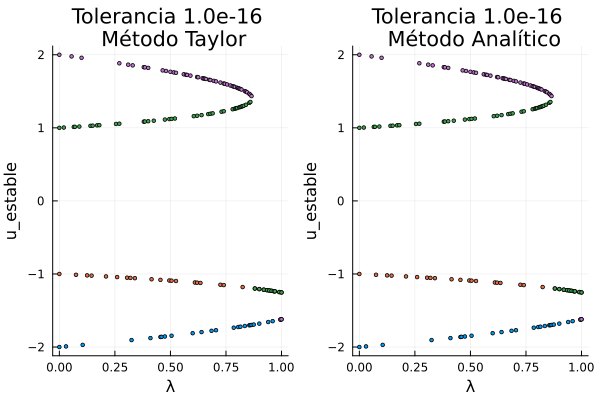

In [240]:
T1 = scatter(Λ, U_sol_T[1],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[1]) \n Método Taylor",markersize = 2)
#plot!(Λ, U_sol_T[1],label = "",linewidth = 3 )
A1 = scatter(Λ, U_sol_A[1],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[1]) \n Método Analítico",markersize = 2)
#plot!(Λ, U_sol_A[1],label = "",linewidth = 3 )
plot(T1,A1)

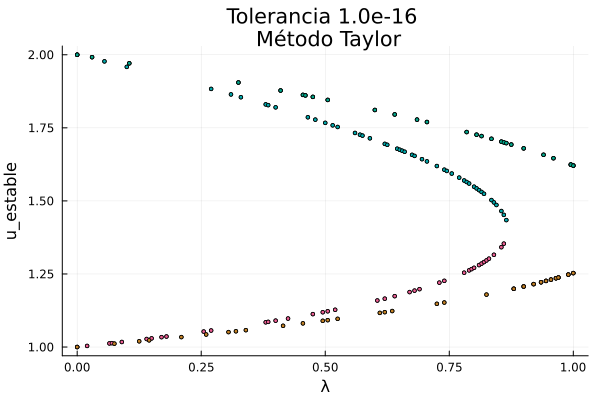

In [227]:
T1 = scatter!(Λ, abs.(U_sol_A[1][1]),label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[1]) \n Método Taylor",markersize = 2)
#plot!(Λ, U_sol_T[1],label = "",linewidth = 3 )
#A1 = scatter(Λ, abs.(U_sol_A[1]),label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[1]) \n Método Analítico",markersize = 2)
#plot!(Λ, U_sol_A[1],label = "",linewidth = 3 )
plot!(T1)

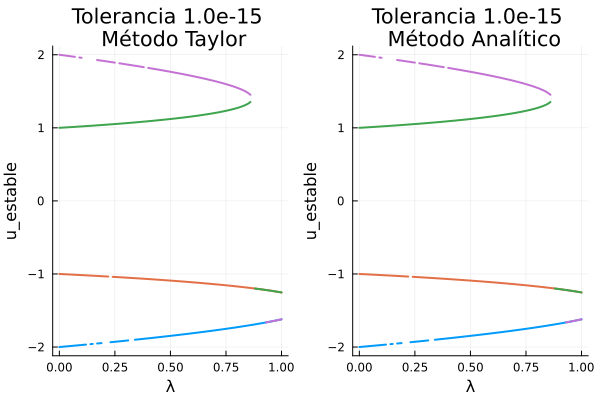

In [131]:
T2 = plot(Λ, U_sol_T[2],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[2]) \n Método Taylor",linewidth = 2)
#scatter!(Λ, U_sol_T[2],label = "", markersize = 2)
A2 = plot(Λ, U_sol_A[2],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[2]) \n Método Analítico",linewidth = 2)
#scatter!(Λ, U_sol_A[2],label = "", markersize = 2)
plot(T2,A2)

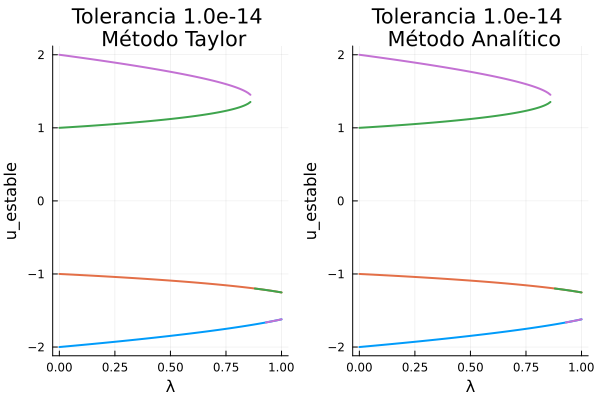

In [132]:
T3 = plot(Λ, U_sol_T[3],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[3]) \n Método Taylor",linewidth = 2)
#scatter!(Λ, U_sol_T[3],label = "", markersize = 2)
A3 = plot(Λ, U_sol_A[3],label = "", xlabel = "λ", ylabel = "u_estable", title = "Tolerancia $(ϵ[3]) \n Método Analítico",linewidth = 2)
#scatter!(Λ, U_sol_A[3],label = "", markersize = 2)
plot(T3,A3)

In [205]:
x0 = [1,1];

In [206]:
N = 2
x = set_variables("x", numvars=N, order = 20);

In [207]:
f(x) = [exp(x[1]+x[2])x[1], sin(x[1])*x[2]]

f (generic function with 1 method)

In [208]:
J_A(x) = [exp(x[1]+x[2])*(x[1]+1) exp(x[1]+x[2])*x[1];
          cos(x[1])*x[2] sin(x[1])]

J_A (generic function with 1 method)

In [209]:
J_A(x0)

2×2 Matrix{Float64}:
 14.7781    7.38906
  0.540302  0.841471

In [210]:
TaylorSeries.jacobian(f(x+x0),[0.0,0.0])

2×2 transpose(::Matrix{Float64}) with eltype Float64:
 14.7781    7.38906
  0.540302  0.841471

In [ ]:
x0 = [1,1];

In [ ]:
using 

In [ ]:
x_new = x0
i = 1
while i <= ite && f(x_new) != zeros(N)
    x_old = x_new
    x = set_variables("x", numvars=N, order = 20)
    x_new = x_old -  
    i += 1
end
x_new

In [69]:
function f!(u,du,λ)
    du[1] = u[1] * u[2]
    du[2] = u[2] + u[1]^2
end

f! (generic function with 1 method)

In [ ]:
function Newton(f,p,x0::Vector{Float64},orden::Int64; ite = 20, tol = 1e-16)
    N = length(x0)
    x_new = x0
    x = set_variables("x", numvars=N)
    
    while i <= ite && f(x_new,p) != 0.0
        x_old = x_new
        x = Taylor1([x_old,1],orden)
        x_new = x_old - (f(x,p)/differentiate(f(x,p)))(0.0)
        i += 1
    end
    if abs(f(x_new,p)) <= tol
        return x_new
    else
        println("El método no convergió en la tolerancia deseada\t |f($(x_new),$(p))| = $(abs(f(x_new,p))) > $(tol)")
        return NaN
    end
end

---

In [243]:
g(x, mu) = x^2 - mu

g (generic function with 1 method)

In [258]:
t = Taylor1(10)

 1.0 t + 𝒪(t¹¹)

In [259]:
x0 = 0.0; mu0 = 0.0

0.0

In [260]:
g(x0+t, mu0)

 1.0 t² + 𝒪(t¹¹)

In [261]:
ans[1]

0.0

In [262]:
g(x0, mu0+t)

 - 1.0 t + 𝒪(t¹¹)

In [257]:
ans[1]

-1.0

In [248]:
derivative(g(x0 + t, mu0), 1)(0.0)

0.0

In [249]:
derivative(g(x0, mu0+t), 1)(0.0)

-1.0